# 1. Visualise data

---

This is a work in progress

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
"""
Some colour just for fun
"""
colour = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(100)]
        
plt.rcParams['figure.figsize'] = [12, 8]

Unique Classes
{64, 65, 67, 6, 42, 15, 16, 52, 53, 88, 90, 92, 62, 95}

Counts per class
[102, 981, 208, 151, 1193, 495, 924, 183, 30, 370, 2313, 239, 484, 175]



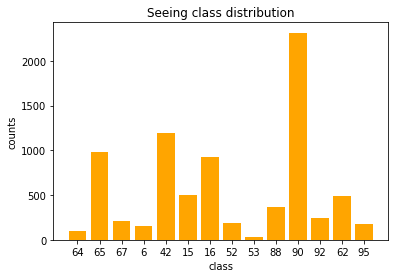

----------------------------------------------------------------------------------------


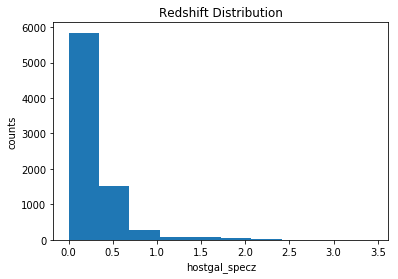

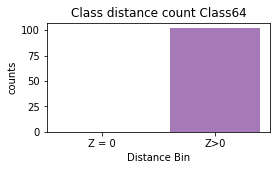

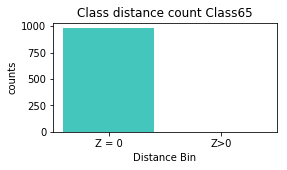

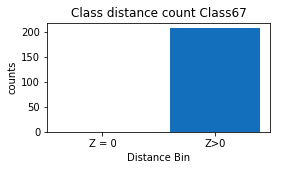

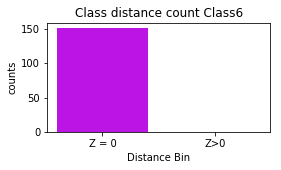

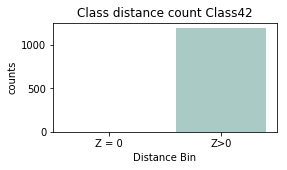

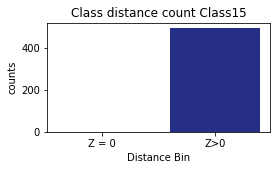

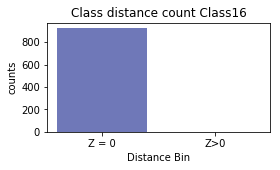

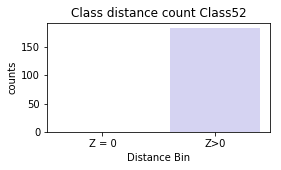

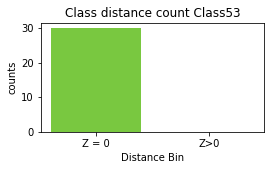

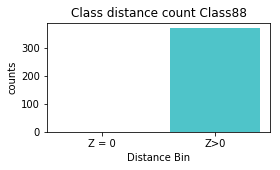

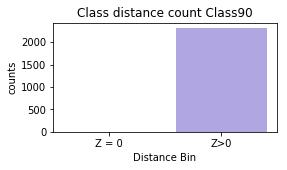

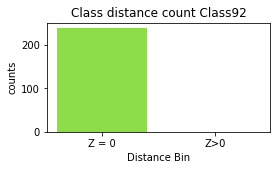

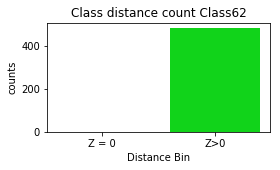

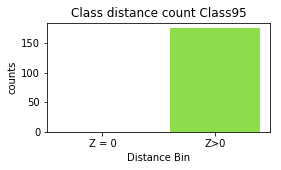

In [2]:
F = open('training_set_metadata.csv', 'r')
ID = []
CLASS =[]
Z_S = [] #spec redshift
Z_P = [] #phot redshift
for line in F.readlines():
 o_id = line.split(',')[0]
 class_id = line.split(',')[-1]
 Spec_z = line.split(',')[6]
 Phot_z = line.split(',')[7]
 if o_id != 'object_id':
    ID.append(int(o_id))
    CLASS.append(int(class_id))
    Z_S.append(float(Spec_z))
    Z_P.append(float(Phot_z))
    
UC = set(CLASS)
counts = []
for c in UC:
    counts.append(CLASS.count(c))

x = np.linspace(1, len(counts), len(counts))
print('Unique Classes')
print(UC)
print('')

print('Counts per class')
print(counts)
print('')

plt.xticks(x, UC)
plt.title('Seeing class distribution')
plt.xlabel('class')
plt.ylabel('counts')
plt.bar(x, counts, color='orange')
plt.show()
print('----------------------------------------------------------------------------------------')


Z0 = []
Z2 = []
Z3 = []
for c in UC:
 for i in range(len(CLASS)):
    if CLASS[i] == c:
        if Z_S[i] == 0:
          Z0.append([c, Z_S[i]]) 
        if Z_S[i] > 0:
          Z2.append([c, Z_S[i]])
        
plt.hist(Z_S)
plt.title('Redshift Distribution')
plt.xlabel('hostgal_specz')
plt.ylabel('counts')
plt.show()
plt.rcParams['figure.figsize'] = [4,2]

for c in UC:
 Z0_count = 0
 Z2_count = 0  
 for Z in Z0:
  if c == Z[0]:
    Z0_count += 1
 for Z in Z2:
  if c == Z[0]:
    Z2_count += 1
 
 
 

 plt.bar([1,2], [Z0_count, Z2_count], color=random.choice(colour))
 plt.title('Class distance count Class'+str(c))
 plt.xlabel('Distance Bin')
 plt.ylabel('counts')
 plt.xticks([1,2], ['Z = 0', 'Z>0'])
 plt.show()

plt.rcParams['figure.figsize'] = [12, 8]

There's a trend in class and distance... let's see if the same binarity exists with phot redshift

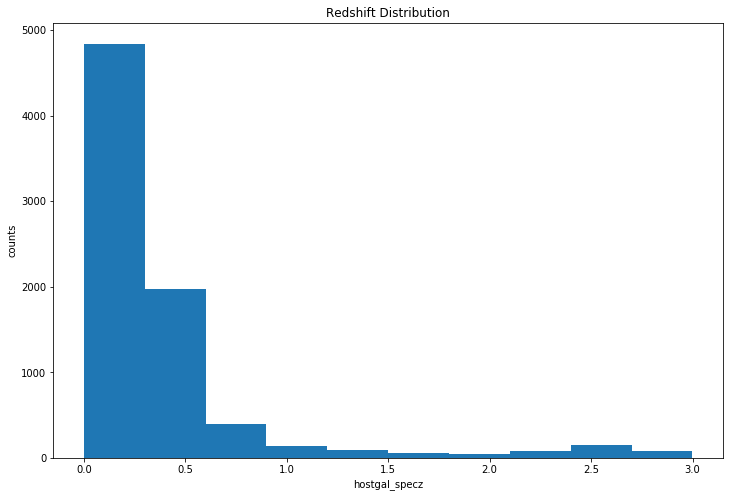

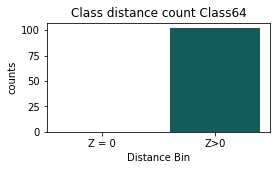

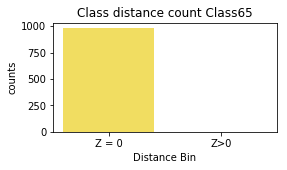

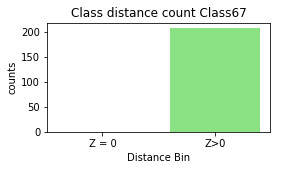

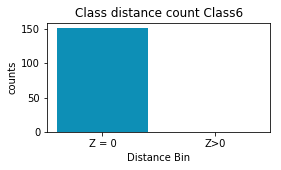

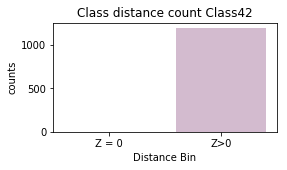

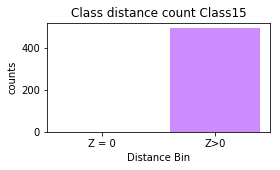

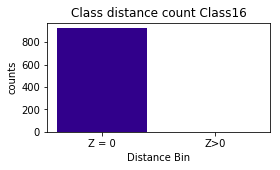

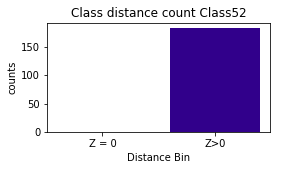

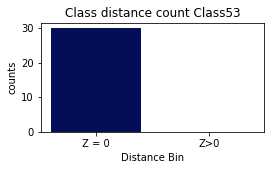

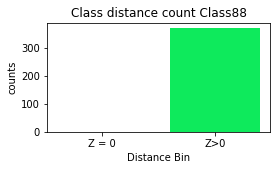

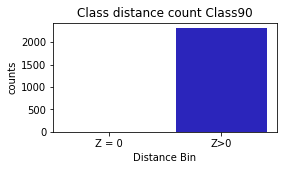

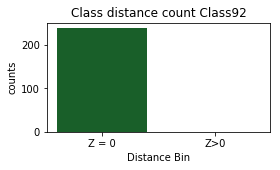

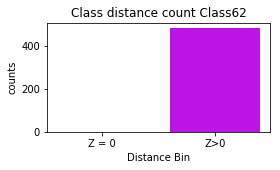

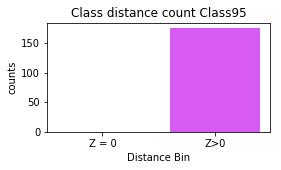

In [3]:
Z0 = []
Z2 = []
Z3 = []
for c in UC:
 for i in range(len(CLASS)):
    if CLASS[i] == c:
        if Z_P[i] == 0:
          Z0.append([c, Z_S[i]]) 
        if Z_P[i] > 0:
          Z2.append([c, Z_S[i]])
        
plt.hist(Z_P)
plt.title('Redshift Distribution')
plt.xlabel('hostgal_specz')
plt.ylabel('counts')
plt.show()
plt.rcParams['figure.figsize'] = [4,2]

for c in UC:
 Z0_count = 0
 Z2_count = 0  
 for Z in Z0:
  if c == Z[0]:
    Z0_count += 1
 for Z in Z2:
  if c == Z[0]:
    Z2_count += 1
 
 
 

 plt.bar([1,2], [Z0_count, Z2_count], color=random.choice(colour))
 plt.title('Class distance count Class'+str(c))
 plt.xlabel('Distance Bin')
 plt.ylabel('counts')
 plt.xticks([1,2], ['Z = 0', 'Z>0'])
 plt.show()

plt.rcParams['figure.figsize'] = [12, 8]

There is a definite class divide between 0 redshift and and redshfit >0. 

There is slight influence on redshift and class placement, however that alone is not enough to determine a class confidently. Also, we're better off using phot_z as a primary catagorizer even though it is less accurate. This is because every test sample has phot_z metadata. See below:

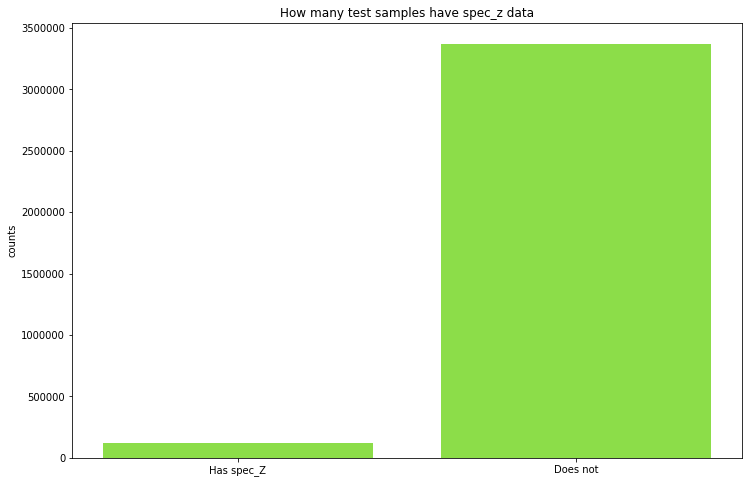

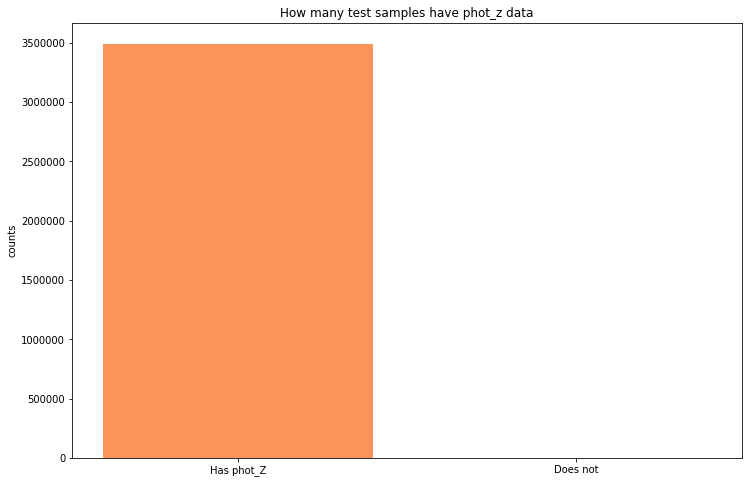

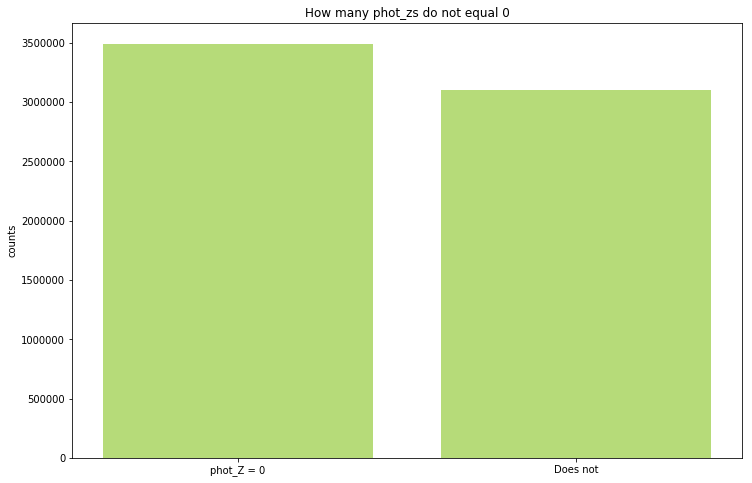

In [4]:
F = open('test_set_metadata.csv', 'r')
ID = []
Z_S = [] #spec redshift
Z_P = [] #phot redshift
for line in F.readlines():
 o_id = line.split(',')[0]
 Spec_z = line.split(',')[6]
 Phot_z = line.split(',')[7]
 if o_id != 'object_id':
    ID.append(int(o_id))
    Z_S.append(Spec_z)
    Z_P.append(Phot_z)
    
counter = 0
for i in Z_S:
    if i == 'nan':
     counter += 1
        
got_spec = len(Z_S) - counter

plt.bar([1,2], [got_spec, counter], color=random.choice(colour))
plt.title('How many test samples have spec_z data') 
plt.ylabel('counts')
plt.xticks([1,2], ['Has spec_Z', 'Does not'])
plt.show()

counter=0
for i in Z_P:
    if i == 'nan':
     counter += 1
        
got_phot = len(Z_P) - counter

plt.bar([1,2], [got_phot, counter], color=random.choice(colour))
plt.title('How many test samples have phot_z data') 
plt.ylabel('counts')
plt.xticks([1,2], ['Has phot_Z', 'Does not'])
plt.show()

for i in Z_P:
 if float(i) > 0:
    counter+=1

phot_0 = len(Z_P) - counter

plt.bar([1,2], [got_phot, counter], color=random.choice(colour))
plt.title('How many phot_zs do not equal 0') 
plt.ylabel('counts')
plt.xticks([1,2], ['phot_Z = 0', 'Does not'])
plt.show()

Last one is a sanity check to make sure there are phot_z=0 in the test data

In [8]:
### This handy visualisation was made available by Alexander Firsov

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os.path
import gc
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import HTML
from IPython.display import Markdown, display

def read_data(directory):
    train_dtypes = {
        'object_id': np.int32,
        'mjd': np.float64,
        'passband': np.int8,
        'flux': np.float32,
    }
    train_file_path = os.path.join(directory, 'training_set.csv')
    #print('reading {}'.format(train_file_path))
    train = pd.read_csv(train_file_path, dtype=train_dtypes, usecols=list(train_dtypes.keys()))

    train_meta_dtypes = {
        'object_id': np.int32,
        'target': np.int8,
    }
    train_meta_file_path = os.path.join(directory, 'training_set_metadata.csv')
    #print('reading {}'.format(train_meta_file_path))
    train_meta = pd.read_csv(train_meta_file_path, dtype=train_meta_dtypes, usecols=list(train_meta_dtypes.keys()))

    object_id_to_target = train_meta.set_index('object_id')['target']
    train['target'] = train['object_id'].map(object_id_to_target)
    assert (pd.isnull(train['target'])).astype(np.int32).sum() == 0

    return train

In [11]:
directory = ''
train = read_data(directory)
classes = train['target'].unique().tolist()
passbands = [x for x in range(6)]
representatives = {}
N = 3
for class_id in classes:
    representatives[class_id] = train[train.target == class_id]['object_id'].sample(N, random_state=254).values.tolist()

# Class 92

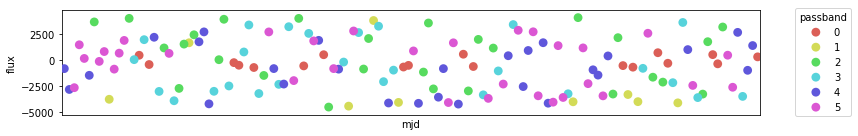

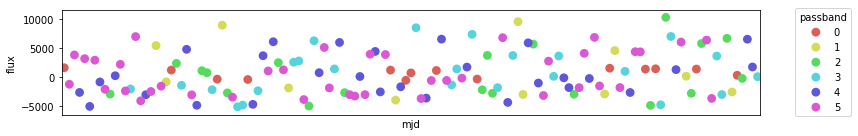

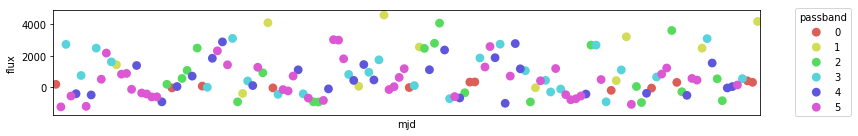

# Class 88

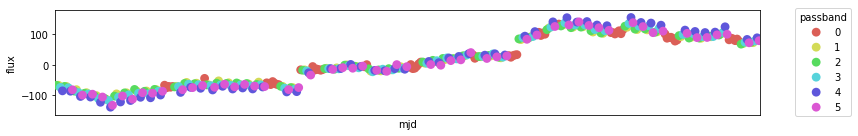

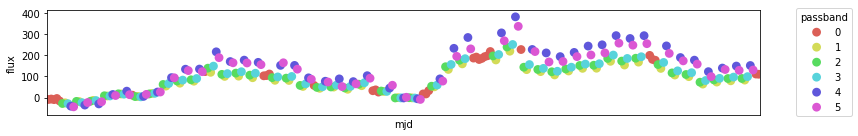

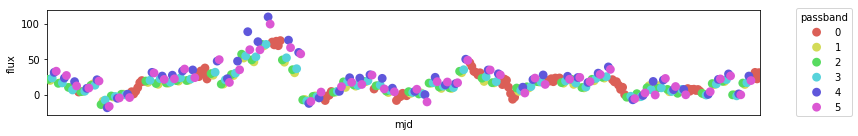

# Class 42

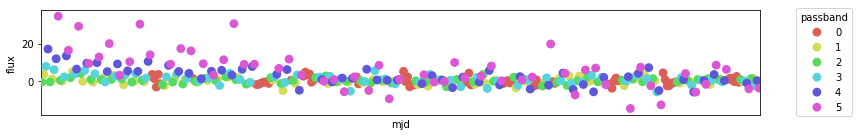

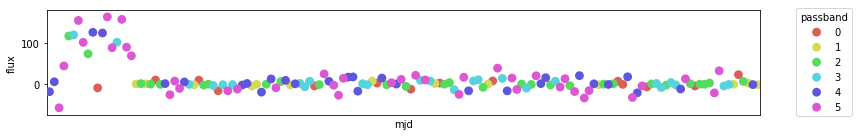

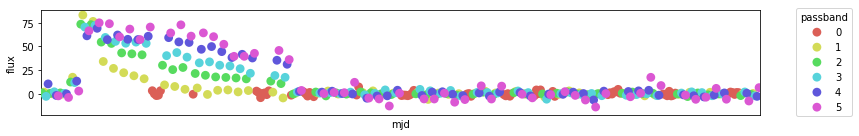

# Class 90

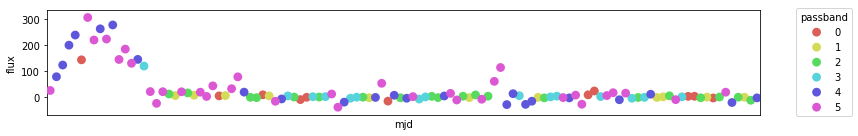

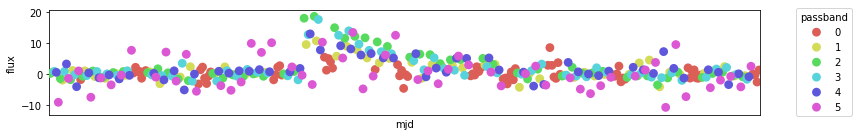

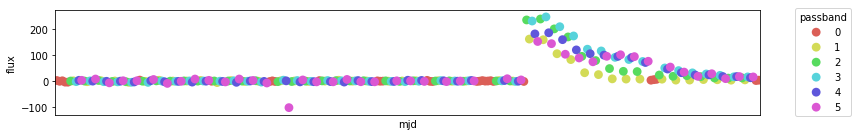

# Class 65

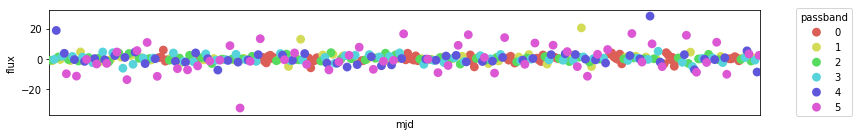

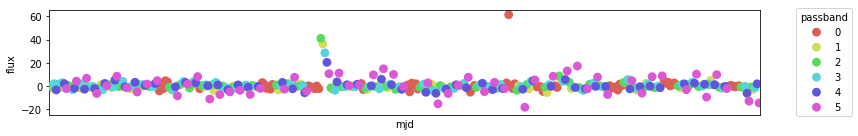

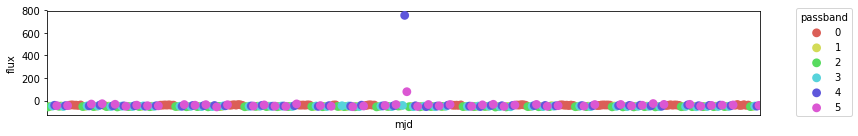

# Class 16

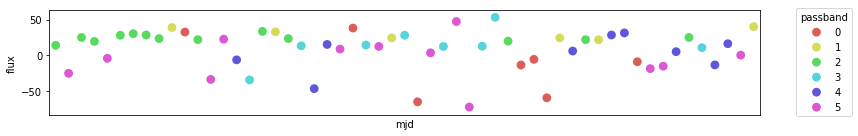

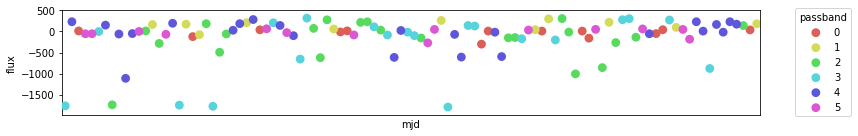

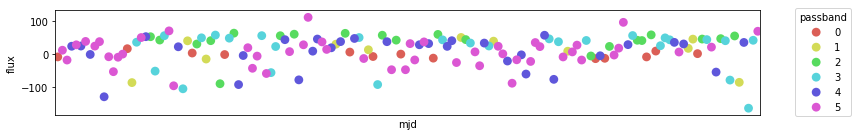

# Class 67

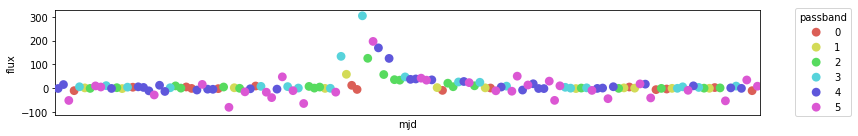

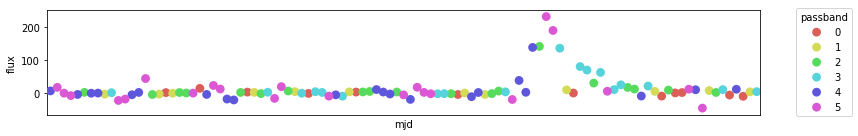

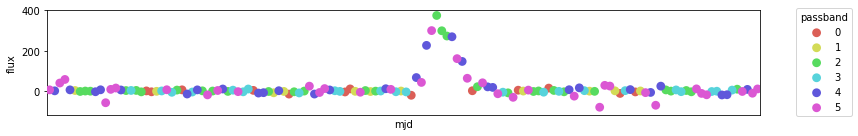

# Class 95

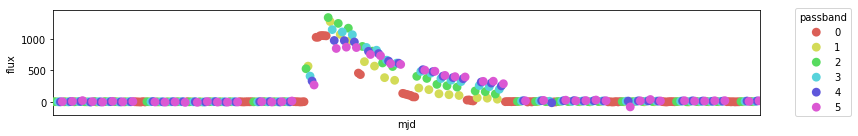

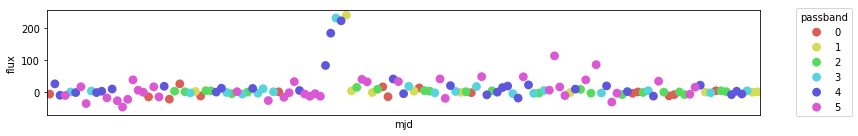

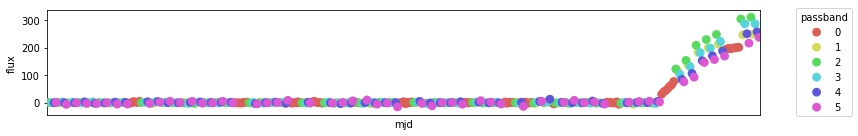

# Class 62

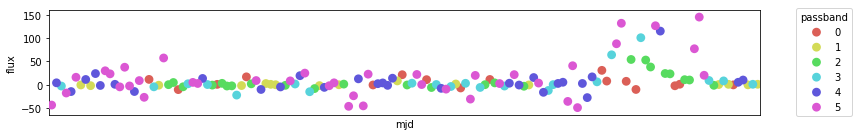

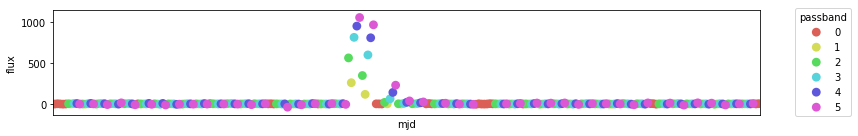

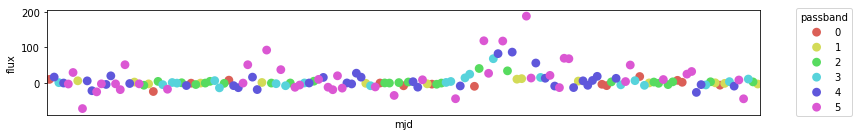

# Class 15

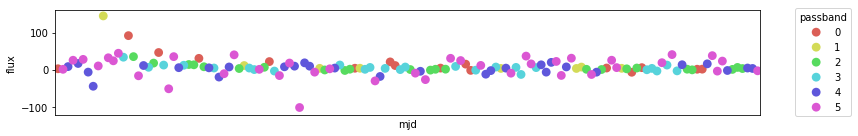

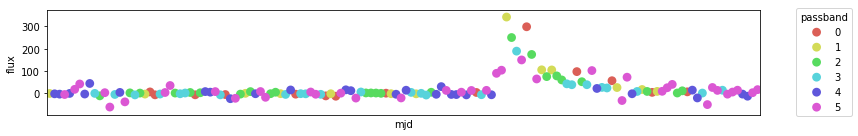

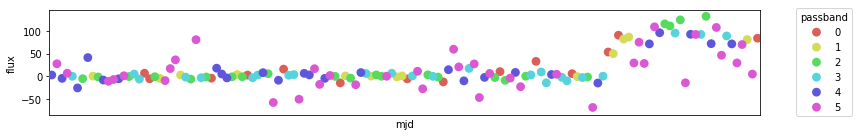

# Class 52

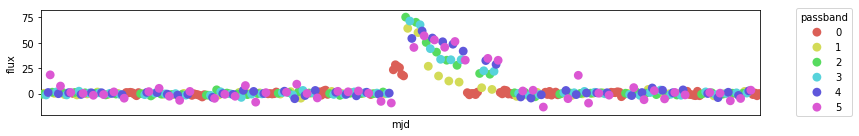

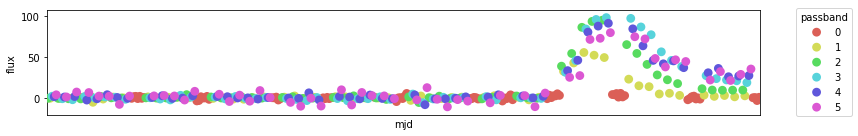

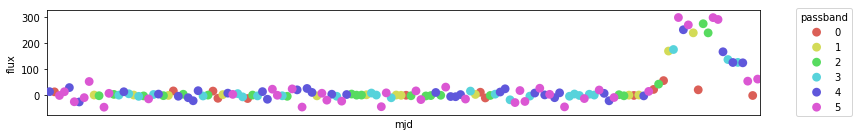

# Class 6

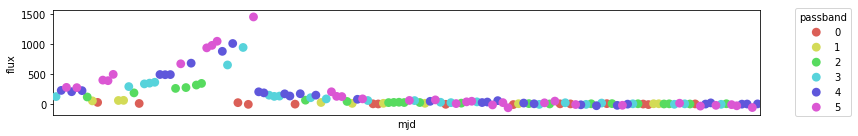

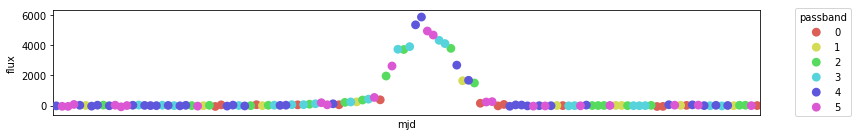

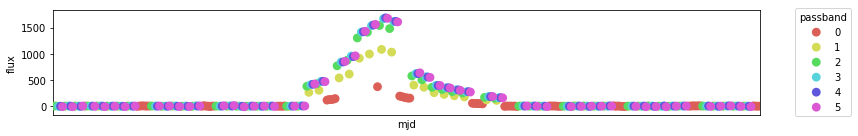

# Class 64

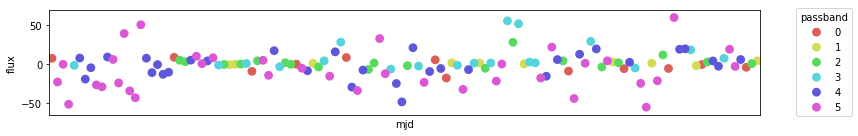

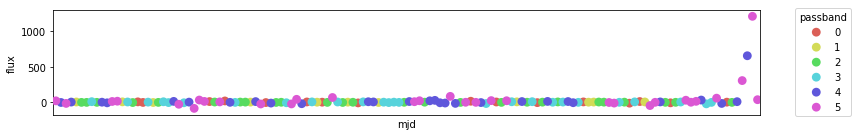

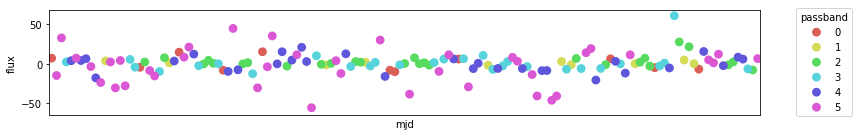

# Class 53

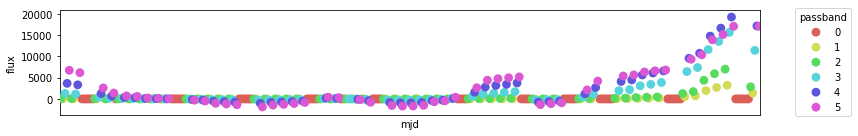

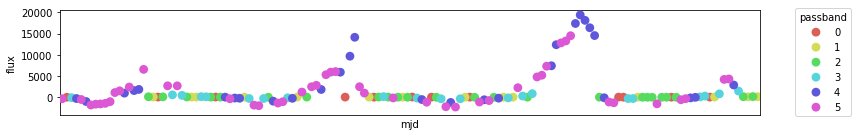

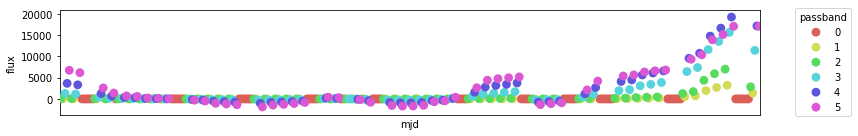

In [12]:
pal = sns.color_palette("hls", n_colors=6)
for class_id, object_ids in representatives.items():
    display(Markdown('# Class {}'.format(class_id)))   
    for i, object_id in enumerate(object_ids):      
        plt.figure(figsize=[12, 2])    
        #display(Markdown('## object {}'.format(object_id)))
        data = train[train.object_id == object_id]        
        ax = sns.pointplot(x="mjd", y="flux", hue="passband", data=data, palette=pal, ci=None, join=False)
#         ax.get_xaxis().set_visible(False)
        plt.tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False)
        plt.legend(bbox_to_anchor=(1.05, 1.02), loc=2, borderaxespad=0., title='passband')            
        plt.tight_layout()
        plt.show()

There is clear periodicity in some of the classes. Using a Lomb-Scargle we can extract period and period amplitude. Finding max period and and plotting it on a histogram, we can see if there is any noteable distribution. 

In [13]:
directory = ''
train = read_data(directory)
classes = train['target'].unique().tolist()
passbands = [x for x in range(6)]
representatives = {}
N = 200
for class_id in classes:
    representatives[class_id] = train[train.target == class_id]['object_id'].sample(N, random_state=1643).values.tolist()

# Class 92

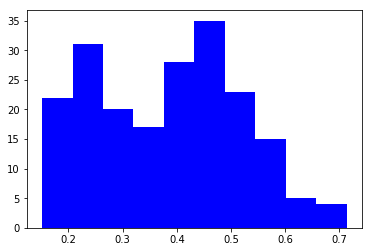

# Class 88

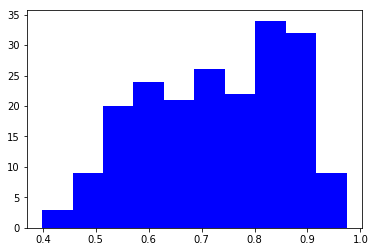

# Class 42

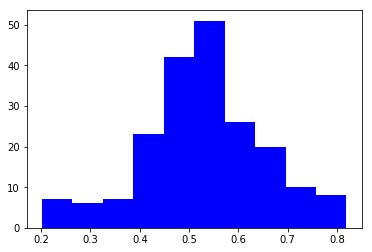

# Class 90

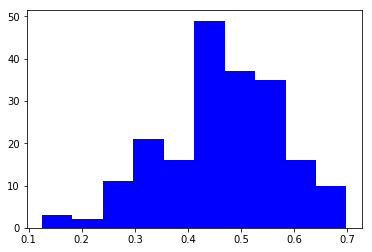

# Class 65

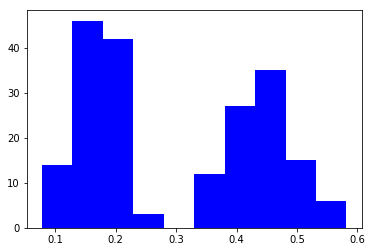

# Class 16

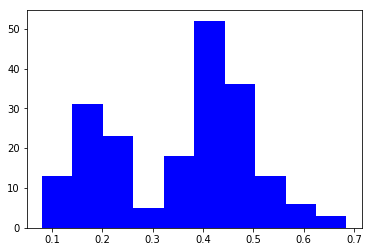

# Class 67

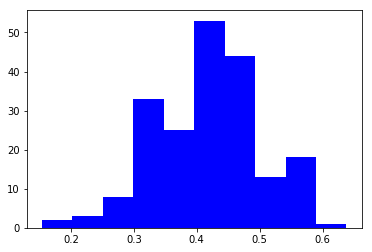

# Class 95

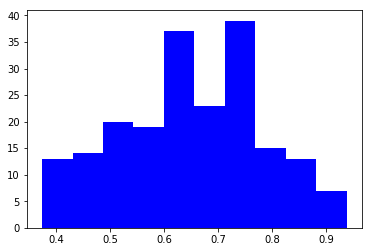

# Class 62

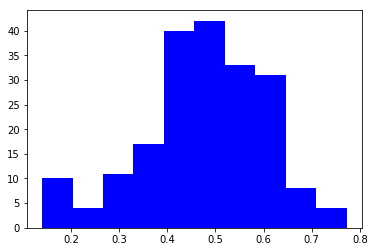

# Class 15

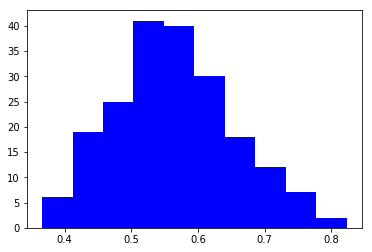

# Class 52

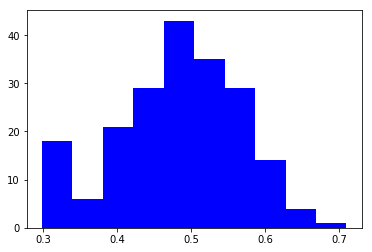

# Class 6

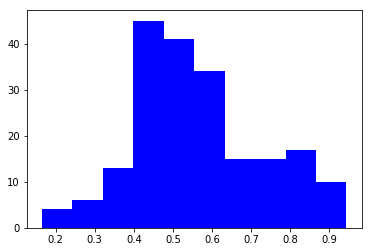

# Class 64

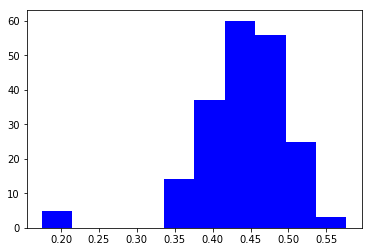

# Class 53

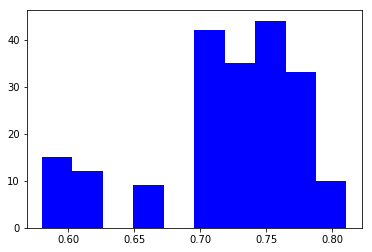

In [16]:
from astropy.stats import LombScargle as LS
for class_id, object_ids in representatives.items():
    display(Markdown('# Class {}'.format(class_id)))
    HIST = []
    for i, object_id in enumerate(object_ids):
            data = train[train.object_id == object_id]
            TOT = 0
            SUM = 0
            for j in range(6):
             F = np.linspace(0.01, 10, 600000)
             MJD = data.query('passband ==' + str(j))['mjd'].as_matrix().astype('float64')
             FLUX= data.query('passband ==' + str(j))['flux'].as_matrix().astype('float64')
             f, p = LS(MJD, FLUX).autopower()
             TOT += 1
             SUM += p.max()
            HIST.append(SUM/TOT)
    plt.hist(HIST, color = 'b')
    plt.show()

There are distibutions for given classes, however some classes have repetaed samples due to low numbers in the training data. Might be worth adding perodicity to meta data. Though the information may not be entirely useful.

Keep an eye out for a multi filter lomb-scargele